# Tutorial for scikit-fem

Run the following cell to install dependencies:

In [1]:
!pip install scikit-fem[all]

     |████████████████████████████████| 144 kB 5.2 MB/s 
     |████████████████████████████████| 167 kB 49.6 MB/s 
     |████████████████████████████████| 229 kB 40.6 MB/s 
     |████████████████████████████████| 51 kB 6.4 MB/s 


# Create mesh

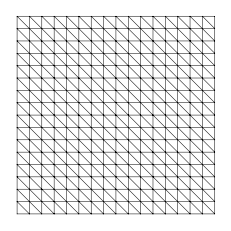

In [2]:
import numpy as np
from skfem import *

m = MeshTri().refined(4)
# one dimensional
# m = MeshLine(np.linspace(0, 1, 15))
# quadrilateral tensor product
# m = MeshQuad.init_tensor(np.linspace(0, 2, 5), np.linspace(0, 1, 3))
# tetrahedral cube
# m = MeshTet().refined()

# or, with your own points and elements:
# m = MeshTri(points, elements)

# or, load from external format:
# m = MeshTri.load("doesnotexist.msh")

# visualize?
from skfem.visuals.matplotlib import draw
draw(m)

# Define the finite element

In [3]:
e = ElementTriP1()
# e = ElementTriP2()  # quadratic
# e = ElementTriP3()  # cubic
# e = ElementQuad1()  # for quadratic meshes
# e = ElementTetP1()  # for tetrahedral meshes

# precompute global basis at quadrature points
basis = Basis(m, e)  # shorthand for CellBasis

# specify integration order
# basis = Basis(m, e, intorder=2)

# to integrate over the boundary use
# fbasis = FacetBasis(m, e)

basis

<skfem CellBasis(MeshTri1, ElementTriP1) object>
  Number of elements: 512
  Number of DOFs: 289
  Size: 36864 B

# Define the forms

In [4]:
from skfem.helpers import dot, grad

@BilinearForm
def laplace(u, v, w):
    # w contains keys such as
    # - the mesh parameter w.h
    # - global coordinates w.x
    # - (for FacetBasis) the normal vector w.n
    return dot(grad(u), grad(v))
    # can be also written without helpers:
    # return u.grad[0] * v.grad[0] + u.grad[1] * v.grad[1]

@LinearForm
def rhs(v, w):
    return 1.0 * v
    # location dependent load:
    # return np.sin(2. * np.pi * w.x[0]) * v

# Assemble and solve the linear system

In [5]:
A = laplace.assemble(basis)
b = rhs.assemble(basis)

# enforce Dirichlet boundary conditions

# on all boundary DOFs
D = basis.get_dofs()

# only left and right boundaries
# D = basis.get_dofs(lambda x: (x[0] == 0.) + (x[0] == 1.))

# for tagged meshes
# D = basis.get_dofs(('left', 'right'))

A, b = enforce(A, b, D=D)

# solve using scipy sparse solver
x = solve(A, b)

# Visualize the solution

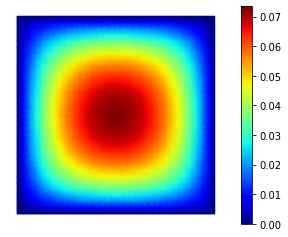

In [6]:
# plot the solution
from skfem.visuals.matplotlib import plot
plot(basis, x, shading='gouraud', colorbar=True)

# save to VTK for visualizing with ParaView:
# m.save('file.vtk', point_data={'x': x})

Check the [gallery](https://scikit-fem.readthedocs.io/en/latest/listofexamples.html) for more examples.